In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import shutil
from tensorflow.keras.utils import plot_model
from keras.optimizers import RMSprop,Adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from google.colab import files
from keras.preprocessing import image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r '/content/drive/MyDrive/newFire' /content/

### Preparing the images that are splitted into train, test, split

In [ ]:
TRAINING_DIR = '/content/newFire/Training'
TEST_DIR = '/content/newFire/Test'
VALIDATION_DIR = '/content/newFire/Validation'

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      horizontal_flip=True,
																			rotation_range=30,
																			height_shift_range=0.2,
                                      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
                                      TRAINING_DIR,
                                      target_size=(224,224),
                                      class_mode='categorical',
                                      batch_size = 64
)

test_generator = test_datagen.flow_from_directory(
                                      TEST_DIR,
                                      target_size=(224,224),
                                      class_mode='categorical',
                                      batch_size= 16
)

validation_generator = validation_datagen.flow_from_directory(
                                      VALIDATION_DIR,
                                      target_size=(224,224),
                                      class_mode='categorical',
                                      batch_size= 16
)


Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


### Creating the model

In [ ]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2048, activation='relu'),
          tf.keras.layers.Dropout(0.25),
          tf.keras.layers.Dense(1024, activation='relu'),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['acc']);

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         2457984   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 384)        0

### Training the model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 15,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 15
)

Epoch 1/50
15/15 [==============================] - 36s 2s/step - loss: 0.4315 - acc: 0.7609 - val_loss: 0.2181 - val_acc: 0.9205
Epoch 2/50
15/15 [==============================] - 25s 2s/step - loss: 0.2765 - acc: 0.9007 - val_loss: 0.2503 - val_acc: 0.9038
Epoch 3/50
15/15 [==============================] - 24s 2s/step - loss: 0.2619 - acc: 0.8919 - val_loss: 0.1698 - val_acc: 0.9331
Epoch 4/50
15/15 [==============================] - 26s 2s/step - loss: 0.2444 - acc: 0.9105 - val_loss: 0.1655 - val_acc: 0.9289
Epoch 5/50
15/15 [==============================] - 24s 2s/step - loss: 0.2243 - acc: 0.9170 - val_loss: 0.1689 - val_acc: 0.9247
Epoch 6/50
15/15 [==============================] - 24s 2s/step - loss: 0.2108 - acc: 0.9214 - val_loss: 0.2103 - val_acc: 0.9205
Epoch 7/50
15/15 [==============================] - 23s 2s/step - loss: 0.2096 - acc: 0.9203 - val_loss: 0.1981 - val_acc: 0.9247
Epoch 8/50
15/15 [==============================] - 24s 2s/step - loss: 0.1783 - acc: 0.93

In [ ]:
#to save the model:
model.save('fire_model.h5')

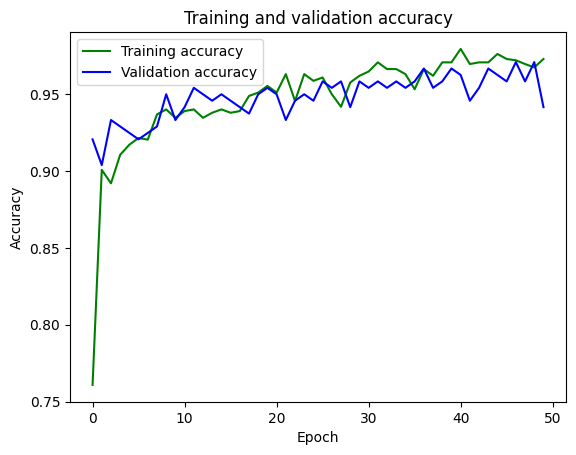

<Figure size 640x480 with 0 Axes>

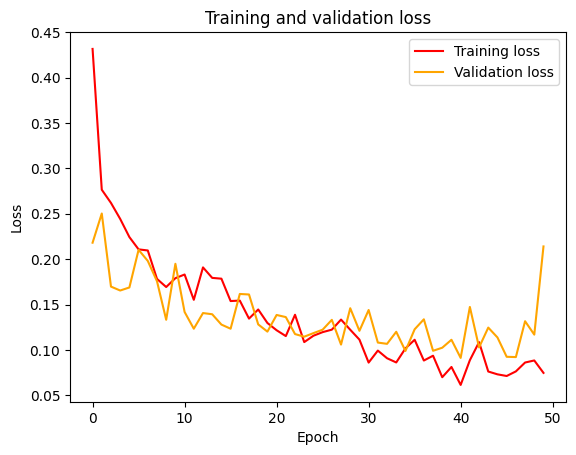

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
#predicting any random image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = tf.keras.utils.load_img(path, target_size=(224, 224))
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0) / 255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

Saving 5b62dc85-ff69-423d-9fde-15fedcb8911f.jpg to 5b62dc85-ff69-423d-9fde-15fedcb8911f.jpg
Saving 50YI0NEQ2NF2.jpg to 50YI0NEQ2NF2 (1).jpg
Saving 52HYZDV7D22S.jpg to 52HYZDV7D22S (1).jpg
Saving 54RZ9YOGWZPM.jpg to 54RZ9YOGWZPM (1).jpg
Saving 445.jpg to 445 (1).jpg
Saving 446.jpg to 446 (1).jpg
Saving 447.jpg to 447 (1).jpg
1/1 [==============================] - 0s 18ms/step
False 0.9154335
1/1 [==============================] - 0s 21ms/step
True 0.99999785
1/1 [==============================] - 0s 17ms/step
True 0.9999974
1/1 [==============================] - 0s 22ms/step
True 0.9999976
1/1 [==============================] - 0s 17ms/step
True 0.50647116
1/1 [==============================] - 0s 20ms/step
False 0.9974995
1/1 [==============================] - 0s 21ms/step
False 0.9706442


In [ ]:
predictions = model.predict(test_generator)

predicted_labels = np.argmax(predictions, axis=1)

true_labels = test_generator.classes

cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

report = classification_report(true_labels, predicted_labels)
print(report)

15/15 [==============================] - 9s 606ms/step
[[116  55]
 [ 39  29]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       171
           1       0.35      0.43      0.38        68

    accuracy                           0.61       239
   macro avg       0.55      0.55      0.55       239
weighted avg       0.63      0.61      0.62       239

